# Sierra Leone EDA Plan

## 1. Summary Statistics & Missing Values
- Use df.describe() to get statistics for all numeric columns.
- Use df.isna().sum() to find missing values.
- Columns with >5% missing values will be flagged for imputation or removal.

## 2. Outlier Detection & Cleaning
- Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust.
- Flag rows with |Z| > 3 as outliers.
- Impute missing values with median for key columns.

## 3. Time Series Analysis
- Plot GHI, DNI, DHI, Tamb vs Timestamp.
- Identify daily and monthly patterns, trends, and anomalies.

## 4. Cleaning Impact
- Compare ModA and ModB before and after cleaning events using groupby.

## 5. Correlation & Relationship Analysis
- Generate correlation heatmap for GHI, DNI, DHI, TModA, TModB.
- Scatter plots:
  - WS, WSgust, WD vs GHI
  - RH vs Tamb and RH vs GHI

## 6. Wind & Distribution Analysis
- Wind rose or radial bar plot for WS and WD.
- Histograms for GHI and WS.

## 7. Temperature Analysis
- Explore influence of RH on temperature readings and solar radiation.

## 8. Bubble Chart
- Plot GHI vs Tamb with bubble size = RH or BP.


In [1]:
import pandas as pd

df_benin = pd.read_csv("../data/raw/sierraleone-bumbuna.csv", parse_dates=['Timestamp'])

df_benin.head()
df_benin.info()
df_benin.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


In [2]:
missing = df_benin.isna().sum()
missing_percent = (missing / len(df_benin)) * 100
missing_report = pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent})
missing_report

,missing_count,missing_percent
Timestamp,0,0.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [3]:
from scipy import stats
import numpy as np

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df_benin[cols_to_check].dropna()))
outliers = (z_scores > 3)
outliers_count = pd.DataFrame(outliers).sum()
outliers_count

0    2477
1    7586
2    2986
3    1604
4    2041
5    3967
6    3665
dtype: int64

In [4]:
for col in cols_to_check:
    median = df_benin[col].median()
    df_benin.loc[outliers[:, cols_to_check.index(col)], col] = median

In [5]:
numeric_cols = df_benin.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df_benin[col].fillna(df_benin[col].median(), inplace=True)

df_benin['Comments'].fillna('', inplace=True)

/tmp/ipykernel_25088/2347355572.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_benin[col].fillna(df_benin[col].median(), inplace=True)
/tmp/ipykernel_25088/2347355572.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

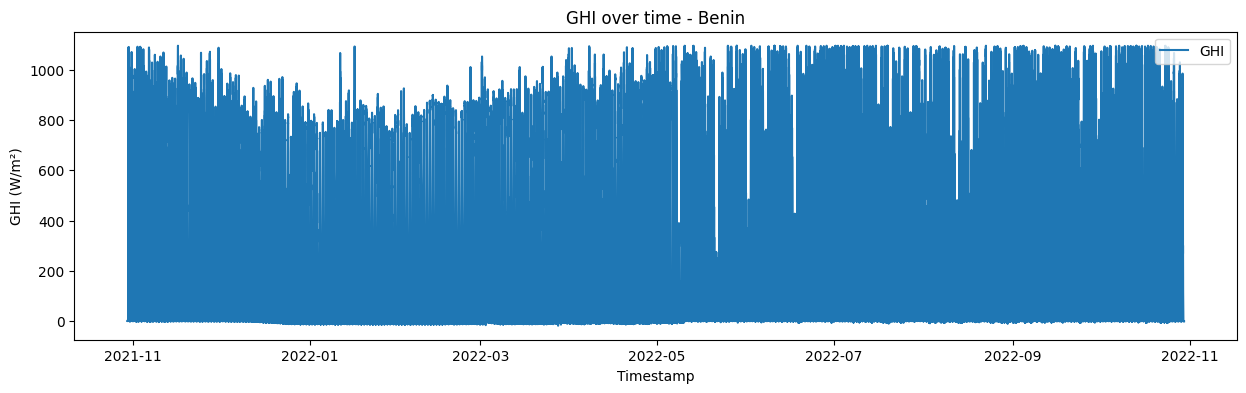

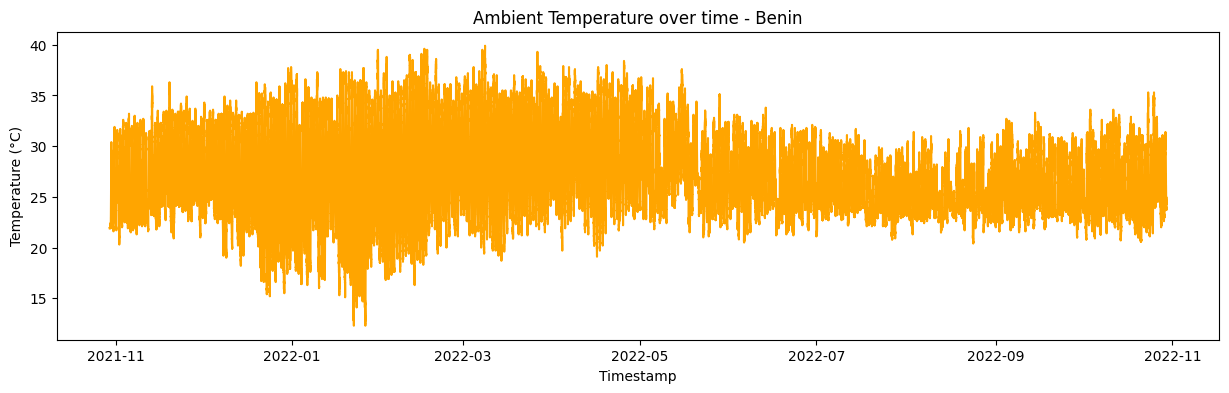

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))
plt.plot(df_benin['Timestamp'], df_benin['GHI'], label='GHI')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.title('GHI over time - Benin')
plt.legend()
plt.show()

plt.figure(figsize=(15,4))
plt.plot(df_benin['Timestamp'], df_benin['Tamb'], label='Tamb', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature over time - Benin')
plt.show()

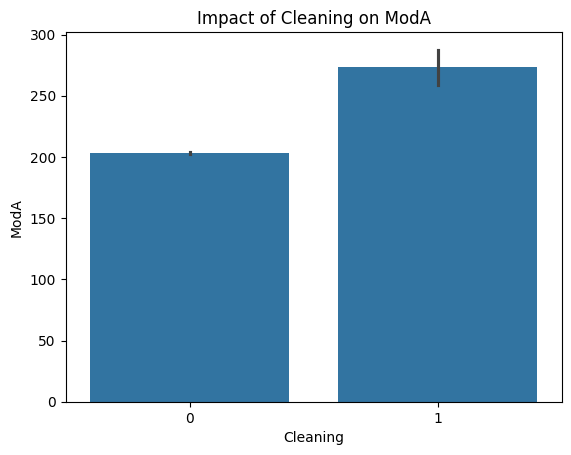

In [7]:
df_benin.groupby('Cleaning')[['ModA', 'ModB']].mean()
sns.barplot(x='Cleaning', y='ModA', data=df_benin)
plt.title("Impact of Cleaning on ModA")
plt.show()

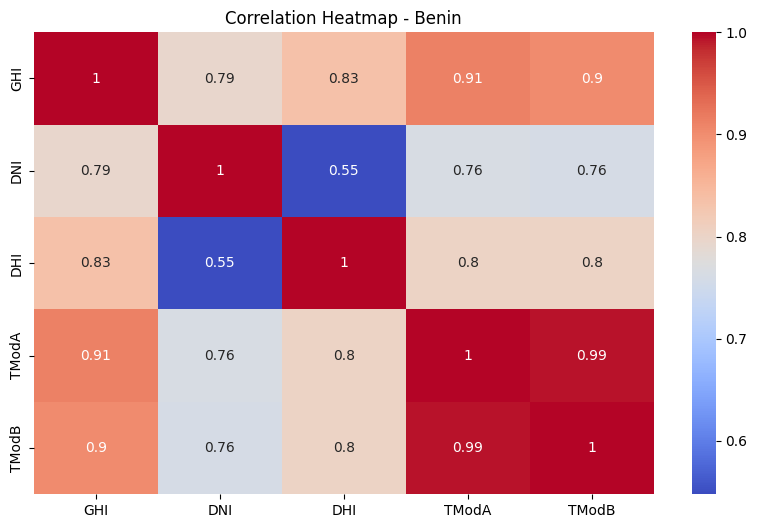

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df_benin[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Benin")
plt.show()

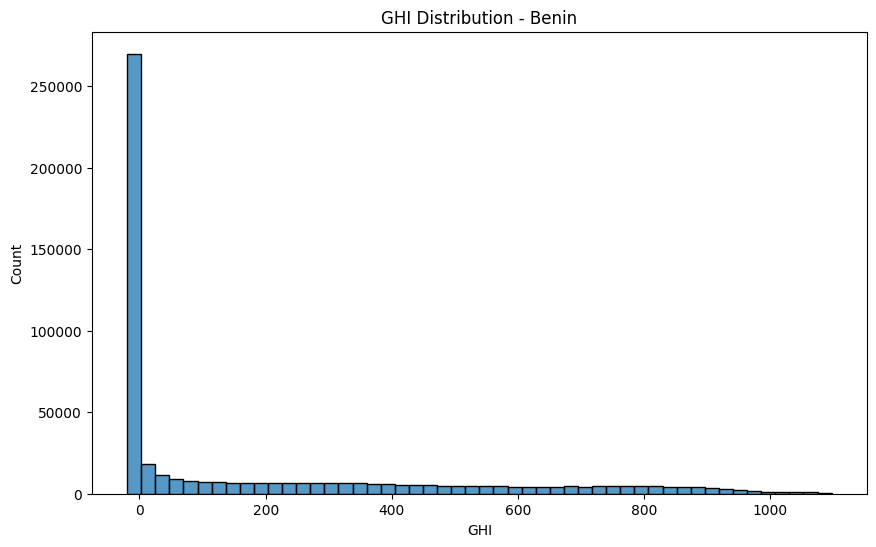

<Figure size 800x800 with 0 Axes>

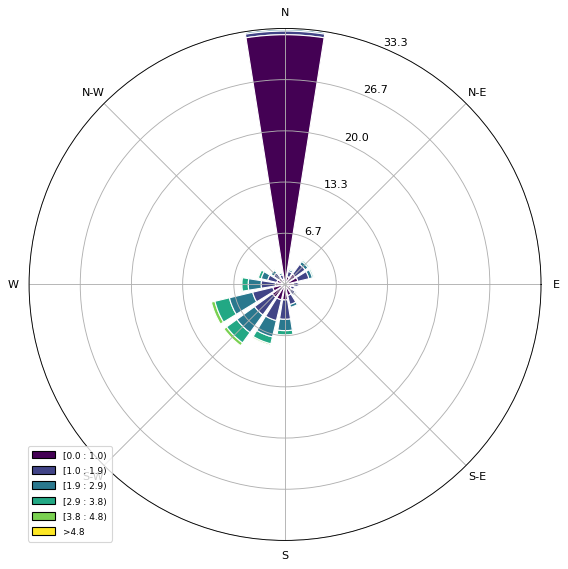

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_benin['GHI'], bins=50)
plt.title("GHI Distribution - Benin")
plt.show()

from windrose import WindroseAxes

plt.figure(figsize=(8,8))
ax = WindroseAxes.from_ax()
ax.bar(df_benin['WD'], df_benin['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()


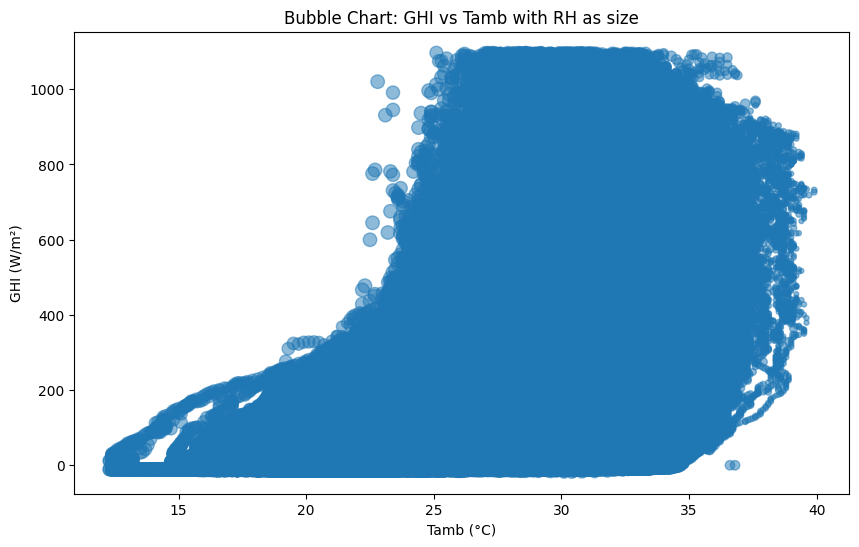

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df_benin['Tamb'], df_benin['GHI'], s=df_benin['RH'], alpha=0.5)
plt.xlabel("Tamb (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("Bubble Chart: GHI vs Tamb with RH as size")
plt.show()

In [11]:
df_benin.to_csv('../data/cleaned/sierraleone-bumbuna_clean.csv', index=False)